In [0]:
import tensorflow as tf
import numpy as np
from numpy import complex128
import matplotlib.pyplot as plt

# tensorflow 0PN waveform
# equations based upon: 
# https://github.com/astrophysicsvivien/TaylorFlow/blob/master/documents/TaylorF2.pdf



In [0]:
def phases_0PN(mTot,freq,mSym,t_c,phi_c):
    # returns the phase orders of the 0PN waveform
    # arguments are total mass, frequencies, symertric mass ratio, coelescence time & coalecencse phase
    return (3/128)*((np.pi*mTot*freq)**(-5/3))*(1/mSym)+(2*np.pi*freq*t_c) - phi_c

def amp_0PN(mChirp,distL,freq):
    #returns the amplitude of the 0PN waveform
    #arguments are chirp mass, luminosity distance and frequency range
    
    return (1/distL)*((5/24)**(1/2))*(np.pi**(-2/3))*(mChirp**(5/6))

def initc(f_low,f_ISCO,df):
    # Define range of frequencies to compute waveform over
    N = int(f_ISCO/df + 1)
    freq = np.linspace(f_low,f_ISCO,N,dtype=complex128)
    return freq

def TaylorF2_0PN(mass1,mass2,f_low,df,d_L,phi_c=np.pi):
    #Returns 0PN taylorF2 waveform
    #arguments are masses of system starting frequency, frequency step, 
    #luminosity distance in Mpc,and coalescence phase
    
    #calculate mass parameters
    M = mass1 + mass2
    eta = (mass1*mass2)/(M**2)
    mChirp = M*(eta**(3/5))
    
    #calculate frequency parameters
    t_c = -1.0/df
    
    # calculatge frequency of innermost stable orbit and initilize frequency space 
    fISCO = 1/(6.**1.5*np.pi*M*4.93e-6)
    f = initc(f_low,fISCO,df)
    
    #calculate waveform components
    
    LuminosityDistance = d_L*3.086e+22
    A = amp_0PN(mChirp,LuminosityDistance,f)
    Psi  = phases_0PN(M,f,eta,t_c,phi_c)
    comp = 1j
    
    waveform = A*(f**(-7/6))*np.exp(comp*Psi)
    return f, waveform



/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


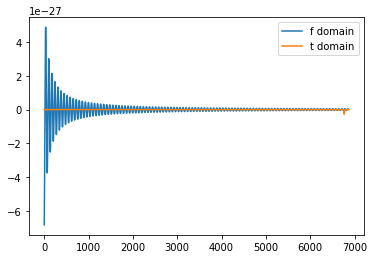

In [22]:
frequencies,waveform = TaylorF2_0PN(1.4,1.8,20,0.2,40)
time_domain = np.fft.ifft(waveform)
t = np.linspace(0,len(frequencies)-1,len(frequencies))

plt.plot(t,waveform)
plt.plot(t,time_domain)
plt.legend(['f domain','t domain'])